## <font color=red> We will manage with the imported bare miniumum libraries. This should run with python=3.x</font>
- Especially note/focus on the code between
```
## NOTE
## END NOTE
```
- In addition to above changes, you can play with arguments to the functions for generating plots.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv # use this function to invert matrices
from google.colab import drive
drive.mount('/content/drive')
#!ls /content/drive/MyDrive/Colab\ Notebooks

Mounted at /content/drive


In [ ]:
#First, we'll install deps for pdf2image.
!apt-get install poppler-utils

#Next, install pdf2image itself.
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.14 [154 kB]
Fetched 154 kB in 1s (124 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.14_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.14) ...
Setting up poppler-utils (0.62.0-2ubuntu2.14) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, ht

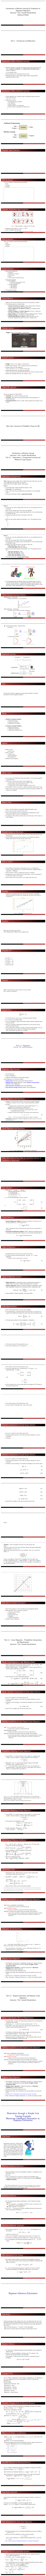

In [ ]:
from pdf2image import convert_from_path
from IPython.display import display, Image

# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt
# create figure
fig = plt.figure(figsize=(500, 400))

# setting values to rows and column variables
rows = 100
columns = 1

images = convert_from_path('/content/drive/MyDrive/Colab Notebooks/Inf-AI-Health-ML1-LinearRegression/IntroToMLAndLinearRegressionFoundations_2022.pdf')
for i, image in enumerate(images):
    fname = "image" + str(i) + ".png"
    image.save(fname, "PNG")
    cv2image = cv2.imread(fname)
    # Adds a subplot at the ith position
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(cv2image)
    plt.axis('off')
#Image(fname, width=600, height=300)



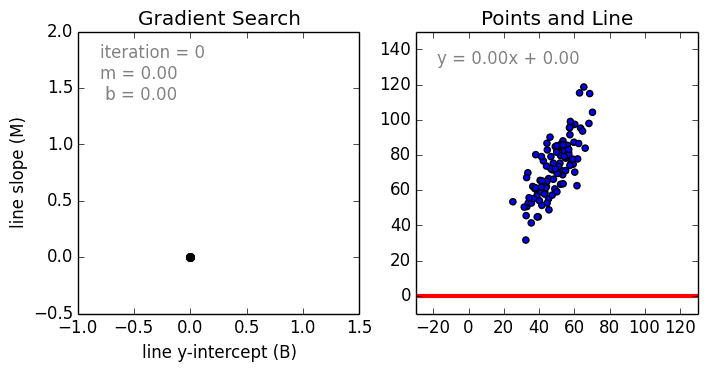

In [ ]:
from IPython.display import Image

Image(open('/content/drive/MyDrive/Colab Notebooks/Inf-AI-Health-ML1-LinearRegression/LinearRegression.gif','rb').read())


#Dataset for the Single Variable Regression exercise

For this colab notebook, we assume a ground truth function $y = f(x) = 1 - 3x - 2 x^2 + 2.5 x^3$. However, as is typical of machine learning, we observe only noisy samples in the datasets that are provided. i.e. The dataset comprises of samples $(x, y)$ such that $y = f(x) + N(0, \sigma^2)$ where $\sigma$ is a hidden parameter that is not revealed to you. You have to use these samples to learn linear regression models using different algorithms.

In [ ]:
data_single = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Inf-AI-Health-ML1-LinearRegression/data/single_var.csv')
X_single = np.array(data_single['x_gt'])
Y_single = np.array(data_single['y_gt'])

data_multi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Inf-AI-Health-ML1-LinearRegression/data/multi_var.csv')
cols = [f"x_gt_{idx}" for idx in range(1, 6)]
X_multi = np.array(data_multi[cols])
Y_multi = np.array(data_multi['y_gt'])

## Plot Graphs

- This function plots the ground truth curve in <font color=green>green</font> and the predicted function in <font color=red>red</font>

In [ ]:
def plot_curves(w, b, x, y):
  '''
  Plots the curves for groud truth function and the fitted function

  Args:
  w - list of parameters
  b - float
  x - data features
  y - output value
  '''

  assert type(w) == type([0]), f'Please pass a list of parameters to plot_curves and not {type(w)}'

  x_gt = np.linspace(-1, 2, 50)
  #https://drive.google.com/file/d/1IKBW65dNeTfw0IZRGdRofYLbWKOfUHlU/view?usp=sharing
  y_gt = 1 - 3 * x_gt - 2 * x_gt ** 2 + 2.5 * x_gt ** 3 #The csv sheets were actually obtained
                                                    #using this function


  if len(w) == 1:         #Single variable regression
    y_fit = w * x_gt + b
  elif len(w) == 5:       #Multiple variable regression on our specific dataset
    x_fit = x_gt
    for pow in range(2, 4):
      x_fit = np.vstack([x_fit, np.power(x_gt, pow)])

    x_fit = np.vstack([x_fit, np.sin(np.pi * 2 * x_gt)])
    x_fit = np.vstack([x_fit, np.cos(np.pi * x_gt)])
    y_fit = np.dot(w, x_fit) + b
  else:
    assert False, 'Pass a valid w'
  plt.plot(x_gt, y_gt, color="green", label='1 - 3 * x - 2 * x ** 2 + 2.5 * x ** 3')
  plt.plot(x_gt, y_fit, color='red', label="Fitted Function y = w.Tx + b")
  if len(x.shape) == 1:
    x_plot = np.vstack([x, np.ones(len(x))]).T
  else:
    x_plot = x
  plt.scatter(x_plot[:,0],y)
  plt.legend()
  plt.title("OLS")
  plt.show()

## Split data into train/validation
- Make sure that training and validation datasets are disjoint
- Split data into train and validation sets such that train contains floor(n_sampes * train_ratio) and test contains the remaining samples
- Complete the function **split_data()**


In [ ]:
def split_data(X, Y, train_ratio=0.6):
    '''
    Split data into train and validation sets such that train
    contains floor(n_sampes * train_ratio) and test contains the remaining
    samples

    Args:
    X - numpy array of shape (n_samples, n_features)
    Y - numpy array of shape (n_samples, 1)
    train_ratio - fraction of samples to be used as training data

    Returns:
    X_train, Y_train, X_val, Y_val
    '''

    ## NOTE
    rows = X.shape[0]
    cols = X.size // rows
    temp = np.concatenate((X.reshape(rows,cols),Y.reshape(rows,1)),axis = 1)
    np.random.seed(0)
    np.random.shuffle(temp)
    rows = temp.shape[0]
    num_train_rows = math.floor(train_ratio * rows)
    X_train = temp[0:num_train_rows,0:-1].reshape((-1,cols))
    Y_train = temp[0:num_train_rows,-1].reshape((-1,1))
    X_val = temp[num_train_rows:,0:-1].reshape((-1,cols))
    Y_val = temp[num_train_rows:,-1].reshape((-1,1))


    ## END NOTE

    return X_train, Y_train, X_val, Y_val

#Ordinary Least Squares (OLS) Regression in one variable  

We will perform Ridge, Lasso Regression and Ordinary Least Squares using the old school method of gradient descent.

Before that lets start with some understanding of basic concepts.

  1. Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function.
  2. As for linear regression for the single variable case (that for 1 dimensional input $x$), we will use the standard $y = wx + b$ slope equation where $w$ is the line's slope and $b$ is the line's y-intercept. To find the best line for our data, we need to find the best set of slope $w$ and $y$-intercept in the form of $b$'s value.
  3. To get started with, $w$ and $b$ are randomly initialized. However, for this assignment, we initialize them with zeros. Hence, we get a random line in the beginning. Our goal is to update these values so that the resulting line gives the least error.
  4. We will use mean squared error `mse' as the cost function, that calculates the error between the actual value output, and prediction from the hypothesis.
   mse = $\frac{1}{N} \sum_{i=1}^N ((wx_i + b) - y_i)^2$
  5. This error function is typically convex - that is, cup-shaped. In simple terms, we can say that the result of convexity is that this error function typically has just one minimum (the global minimum).
  6. When we start with random values of $w$ and $b$, we get some value of $y$ correspondingly. Error is minimum at the lowest point on this graph, so our goal is to move down the slope to finally reach the bottom-most point.
  7. The slope of the tangent at any point on a graph is equal to the derivative of the graph w.r.t. input variables.
  8. The slope of tangent at the bottom-most point on the graph is $0$, *i.e.*, the partial derivatives of $mse$ at the bottom-most point are $0$. To get to the bottom-most point, we have to move in the direction of the slope. That is,  we will update values of $w$ and $b$, such that we eventually get to the optimum values, where error function is minimum.


##Completing the mse single variable code...
- Complete the function **mse_single_var()**


In [ ]:
def mse_single_var(X, Y, w, b):
    '''
    Compute mean squared error between predictions and true y values

    Args:
    X - numpy array of shape (n_samples, 1)
    Y - numpy array of shape (n_samples, 1)
    w - a float
    b - a float
    '''

    ## NOTE
    rows = X.shape[0]
    mse = np.sum((w * X + b - Y)**2) / rows

    ## END NOTE

    return mse


## Gradient Descent updates for single variable regression
1. The update equations are
   $$
   \begin{pmatrix}
   w^{new} \\
   b^{new}
   \end{pmatrix}
   =
  \begin{pmatrix}
   w^{old} \\
   b^{old}
   \end{pmatrix}
    - \eta \nabla mse(w^{old},b^{old})
   $$
2. Here, $\nabla mse(w^{old},b^{old})$ denotes the 'gradient' vector  $\nabla mse(w,b)$ evaluated at $w^{old},b^{old}$. Further, $\nabla mse(w,b)$ is defined as
   $$
   \nabla mse(w,b) = \begin{pmatrix}
   \frac{\partial mse(w,b)}{\partial w} \\
   \frac{mse(w,b)}{\partial b} \\
   \end{pmatrix}
   $$
    
    and $\eta$ is called the 'learning rate' that determines how large the steps should be in the direction of the gradient. If the value of $\eta$ is set to be very small, reaching the optimum value is guaranteed, but it will take a lot of time to converge. If $\eta$ is very large, the values of $w$ and $b$ might overshoot the optimal values, and then the error will start to increase instead of decreasing. Hence, learning rate plays an important part in convex optimization.

3. Based on the directions specified above, let us write down the specific expression for  $\nabla mse(w,b)$.

$$\nabla_w mse = 2 * \frac{1}{N} \sum (wx_i + b - y_i) x_i \\
  \nabla_b mse = 2 * \frac{1}{N} \sum (wx_i + b - y_i)$$

##Completing the gradient update and learning code...
1.   Complete the **singlevar_grad()** and **singlevar_closedform()** functions. You can modify **lr** and **max_iter** if needed for gradient descent based solution. Plot the generated figures
2.   Is it possible to obtain a solution using  **singlevar_grad()** such that its  training loss is strictly less than that of the solution obtained by **singlevar_closedform()**? If yes, mention the parameters that you obtain. Else, contradict and argue why it is not possible.   

In [ ]:
def singlevar_grad(X_train, Y_train, X_val, Y_val, epochs=5000, lr=1e-2):
    '''
    Perform single variable least squares regression using gradient descent

    Args:
    X_train - numpy array of shape (n_samples_train, 1)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 1)
    Y_val - numpy array of shape (n_samples_val, 1)
    epochs - number of gradient descent steps
    lr - learnig rate
    '''

    # Initialize the parameters with 0
    w = 0
    b = 0

    ## NOTE
    for exp in range(epochs):
        n_samples = X_train.shape[0]
        dw = 2/n_samples * (np.sum(X_train*(w*X_train + b - Y_train)))
        db = 2/n_samples * (np.sum(w*X_train + b - Y_train))
        w = w - lr * (dw)
        b = b - lr * (db)


    ## END NOTE

    mse_train = mse_single_var(X_train, Y_train, w, b)
    mse_val = mse_single_var(X_val, Y_val, w, b)
    print(f'Validation loss is {mse_val}')
    print(f'Training Loss loss is {mse_train}')
    plot_curves([w], b, X_train, Y_train)
    return w, b



#Moving to Multiple Variable Regression


##Solution in Closed form for single as well as multiple variable regression

Let $N$ be the number of samples each having $d$ features. Given the feature matrix $X$ ($d \times N$ dimensional matrix) the outputs $\hat{\mathbf y}$ (column vector of size $N$) and ${\mathbf w}$ (the weight vector of size $d$) to be learnt, solve following:

*(Note: Assume ${\mathbf w}$ to be a column vector - that is a ${\mathbf w} \in \Re^{d\times1}$)*

1.   The predicted output for the $i^{th}$ sample ${\mathbf x}_i$ is  $\hat{y}_i = {\mathbf x}_i^T{\mathbf w}$. Compute the predicted $\hat{\mathbf y}$ for all the $N$ samples

ANS: $$\hat{\mathbf y}= X^T{\mathbf w}$$

2.   The squared loss is a commonly used error/loss function. It is the sum of squares of the differences between the actual value and the predicted value. For the minimum squared error loss function  $mse = \frac1{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2$, where $\hat{y}_i = {\mathbf x}_i^T{\mathbf w}$. Derive vectorized formula for $\frac{\partial mse}{\partial W}$

ANS:

\begin{equation}
E(f, \mathcal{D}) = mse = \frac{1}{N} \displaystyle \sum_{i=1}^N \left({\mathbf x}_i^T{\mathbf w} - y_i\right)^2 =  \frac{1}{N}\|X^T {\mathbf w} - {\mathbf y} \|^2 = \frac{1}{N}\left({\mathbf w}^TXX^T{\mathbf w} - 2{\mathbf w}^TX{\mathbf y} + {\mathbf y}^T{\mathbf y}\right)
\end{equation}
Thus, one can derive $$ \nabla_w mse = \frac{2}{N}X(X^T{\mathbf w} - {\mathbf y})$$
- The least square solution for linear regression is obtained as
\begin{equation}
{\mathbf w}^* = \underset{{\mathbf w}}{\operatorname{argmin}}\  \displaystyle \left[ \sum_{i=1}^N \left({\mathbf x}_i^T{\mathbf w} - y_i\right)^2 \right]
\end{equation}

- The minimum value of the squared loss is zero. Since the mse loss is convex, the solution ${\mathbf w}^*$ can be obtained by setting the gradient of the mse to $0$ and solving for ${\mathbf w}^*$. But below, we provide another intuitive solution
- If zero were attained at ${\mathbf w}^*$, we would have $\forall u, {\mathbf x}_u^T{\mathbf w}^* = y_u$, or equivalently $X^T {\mathbf w}^* = {\mathbf y}$, where

\begin{equation}
X =
  \begin{bmatrix}
    {\mathbf x}_1[1] & ... & {\mathbf x}_N[1] \\
    ... & ... & ...\\
    {\mathbf x}_1[d] & ... & {\mathbf x}_N[d] \\
  \end{bmatrix}
\end{equation}

and

\begin{equation}
{\mathbf y} =
  \begin{bmatrix}
    y_1 \\
    ... \\
    y_N \\
  \end{bmatrix}
\end{equation}
- It has a solution if ${\mathbf y}$ is in the column space (the subspace of $R^N$ formed by the column vectors) of $X^T$
- The minimum value of the squared loss is zero. But if zero were NOT attainable at ${\mathbf w}^*$, what can be done?

##The  Least Square Solution in closed form and its Geometric Interpretation

- Let ${\mathbf y}^*$ be a solution in the column space of $X^T$. Thus,
\begin{equation}
X^T {\mathbf w} = {\mathbf y}^*
\end{equation}

- The least squares solution is such that the distance
between ${\mathbf y}^*$ and ${\mathbf y}$ is minimized
- Therefore, the line joining ${\mathbf y}^*$ to ${\mathbf y}$ should be orthogonal to the column space of $X^T$, leading to the following steps of derivation:


\begin{equation}
({\mathbf y} - {\mathbf y}^*)^T X^T = 0
\end{equation}

Thus...
\begin{equation}
({\mathbf y}^*)^T X^T = ({\mathbf y})^T X^T
\end{equation}

Now substituting ${\mathbf y}^*=X^T {\mathbf w}$ from above...
\begin{equation}
(X^T {\mathbf w})^T X^T  = {\mathbf y}^T X^T
\end{equation}
On expanding the transpose..
\begin{equation}
{\mathbf w}^T X X^T  = {\mathbf y}^T X^T
\end{equation}
Taking transpose of both sides....

\begin{equation}
X X^T {\mathbf w} = X {\mathbf y}
\end{equation}
Finally, solving by taking inverse of $XX^T$ to the right hand side (RHS)..
\begin{equation}
 {\mathbf w} = (X X^T)^{-1}  X {\mathbf y}
\end{equation}

- We know from linear algebra that $X X^T$ is invertible if and only if $X^T$ has full column rank



In [ ]:

def singlevar_closedform(X_train, Y_train, X_val, Y_val):
    '''
    Perform single variable least squares regression using closed form update
    rules

    Args:
    - Note that the X_train here is the transpose of the X that we use in our mathematical expressions above
    X_train - numpy array of shape (n_samples_train, 1).
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 1)
    Y_val - numpy array of shape (n_samples_val, 1)
    '''

    w = 0
    b = 0

    ## NOTE
    X_temp  = X_train.reshape((-1,1))  #-1 argument in reshape means n_samples x d matrix X_train should become _x1.
                     #and that _ should be figured out by the program (since -1 is specified in its place)
    Y_temp  = Y_train.reshape((-1,1)) #-1 argument in reshape means n_samples x 1 vector Y_train should become _x1.
                     #and that _ should be figured out by the program (since -1 is specified in its place)
    num_samples = X_train.shape[0]
    X_temp = np.concatenate((X_temp, np.ones((num_samples,1))),axis = 1)
    res = np.matmul(inv(np.matmul(X_temp.T,X_temp)) , np.matmul(X_temp.T,Y_temp))
    res = res.reshape((-1,1))
    w = res[0,0]
    b = res[1,0]

    ## END NOTE


    mse_train = mse_single_var(X_train, Y_train, w, b)
    mse_val = mse_single_var(X_val, Y_val, w, b)
    print(f'Validation loss is {mse_val}')
    print(f'Training Loss loss is {mse_train}')
    plot_curves([w], b, X_train, Y_train)
    return w, b

##Gradient descent for Multivariate Linear regression
\begin{equation}
E(f, \mathcal{D}) = mse =\frac{1}{N} \displaystyle \sum_{j=1}^m (f(x_j) - y_j)^2 = \frac{1}{N} \displaystyle \sum_{i=1}^N \left({\mathbf x}_i^T{\mathbf w} - y_i\right)^2 =  \frac{1}{N}\|X^T {\mathbf w} - {\mathbf y} \|^2 = \frac{1}{N}\left({\mathbf w}^TXX^T{\mathbf w} - 2{\mathbf w}^TX{\mathbf y} + {\mathbf y}^T{\mathbf y}\right)
\end{equation}
- The final descent update
\begin{equation} -\eta \nabla mse\left({\mathbf w}\right)=-\frac{2}{N}\eta \left[X X^T {\mathbf w} - X{\mathbf y} \right]
\end{equation}
- The iterative update rule:
\begin{equation} {\mathbf w}^{(k+1)} = {\mathbf w}^{k}  -\frac{2}{N}\eta \left[X X^T {\mathbf w}^k - X{\mathbf y} \right]
\end{equation}


**Question:**  Under what condition on the columns of data matrix $X^T$ does there exist no solution for the closed form. Does gradient descent converge to a solution in that case?

ANS:
- There is no closed form solution when $rank(X^T) < \#cols(X^T)$
- Gradient descent will however converge to a solution even if $rank(X^T) < \#cols(X^T). But the solution need not be unique.
- As discussed, X^T having full column rank means that the features in regression are not redundant or mere copies of each other. That is, you are engineering the features smartly. But one way you can bailed out is REGULARIZATION


In [ ]:
def mse_multi_var(X, Y, w, b):
    '''
    Compute mean squared error between predictions and true y values

    Args:
    X - numpy array of shape (n_samples, 5) - note that this X is the transpose of the X in the derivations above. So take care accordingly.
    Y - numpy array of shape (n_samples, 1)
    w - list of parameters
    b - a float
    '''

    ## NOTE
    n_samples = X.shape[0]
    X_temp = np.concatenate((X,np.ones((n_samples,1))),axis = 1)
    W_temp = np.concatenate((w,np.asarray([b])),axis = 0).reshape((-1,1))
    mse = 1/n_samples * np.sum((Y.reshape((-1,1))-np.matmul(X_temp,W_temp))**2)

    ## END NOTE

    return mse

# Regularized Multi Variable Regression


For Regularized (Ridge) regression loss function $mse = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2 + \lambda \|{\mathbf w}\|^2$.


In [ ]:
def mse_regularized(X, Y, w, b, lamda):
    '''
    Compute mean squared error between predictions and true y values

    Args:
    X - numpy array of shape (n_samples, 5)
    Y - numpy array of shape (n_samples, 1)
    w - list of parameters
    b - a float
    '''

    ## NOTE
    #don't add b**2 in error calculation
    mse = mse_multi_var(X,Y,w,b) + lamda * np.sum(w**2)



    ## END NOTE

    return mse

Validation loss is 2.8545040171579816
Training Loss loss is 1.5356754508847659


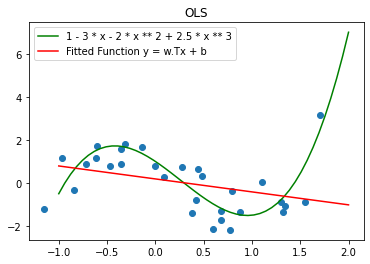

------------------------------------------------------------------------------------------------------------------------
Validation loss is 2.85450401715799
Training Loss loss is 1.535675450884766


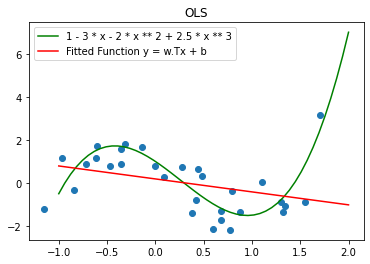

(-0.6021871352788613, 0.1866033863189822)

In [ ]:
X_train, Y_train, X_val, Y_val = split_data(X_single, Y_single, train_ratio=0.6)

singlevar_grad(X_train, Y_train, X_val, Y_val)

print('----'*30)

singlevar_closedform(X_train, Y_train, X_val, Y_val)

###Now, Complete the following functions for learning multivariable regression
1.  Complete the functions **mse_multi_var** and **mse_regularized**
2.  Complete the functions **multivar_grad** and **multivar_closedform**. Include the generated plots.

In [ ]:
def multivar_grad(X_train, Y_train, X_val, Y_val, epochs=5000, lr=0.05):
    '''
    Perform multi variable least squares regression using gradient descent

    Args:
    X_train - numpy array of shape (n_samples_train, 5)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 5)
    Y_val - numpy array of shape (n_samples_val, 1)
    epochs - number of gradient descent steps
    lr - learnig rate
    '''

    w = [0.0] * X_train.shape[1]
    b = 0

    ## NOTE
    n_samples = X_train.shape[0]
    X_train_temp = np.concatenate((X_train,np.ones((n_samples,1))),axis = 1)
    W_temp = np.concatenate((np.asarray(w),np.asarray([b])),axis = 0)
    W_temp = W_temp.reshape((-1,1))
    for exp in range(epochs):
        grad = 2/n_samples * np.matmul(X_train_temp.T, (np.matmul(X_train_temp,W_temp)-Y_train.reshape((-1,1))))
        W_temp = W_temp - lr * grad
    w = W_temp[0:-1].reshape(-1)
    b = float(W_temp[-1])



    ### END NOTE

    mse_train = mse_multi_var(X_train, Y_train, w, b)
    mse_val = mse_multi_var(X_val, Y_val, w, b)
    print(f'Validation loss if {mse_val}')
    print(f'Training Loss loss if {mse_train}')
    plot_curves(list(w), b, X_train, Y_train)
    return w, b



def multivar_closedform(X_train, Y_train, X_val, Y_val):
    '''
    Perform multi variable least squares regression using closed form
    updates

    Args:
    X_train - numpy array of shape (n_samples_train, 5)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 5)
    Y_val - numpy array of shape (n_samples_val, 1)
    '''

    w = [0.0] * X_train.shape[1]
    b = 0

    ## NOTE
    n_samples = X_train.shape[0]
    X_train_temp = np.concatenate((X_train,np.ones((n_samples,1))), axis = 1)
    res = np.dot(inv(np.dot(X_train_temp.T,X_train_temp)),np.dot(X_train_temp.T,Y_train))
    w = res[:-1,].reshape(-1)
    b = float(res[-1,])


    ## END NOTE

    mse_train = mse_multi_var(X_train, Y_train, w, b)
    mse_val = mse_multi_var(X_val, Y_val, w, b)
    print(f'Validation loss if {mse_val}')
    print(f'Training Loss loss if {mse_train}')
    plot_curves(list(w), b, X_train, Y_train)
    return w, b

Validation loss if 0.6577399484936411
Training Loss loss if 0.5802756043953992


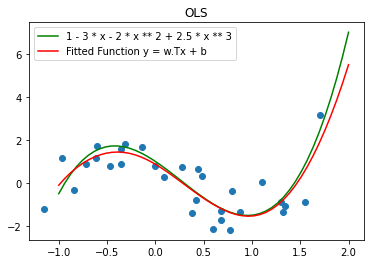

------------------------------------------------------------------------------------------------------------------------
Validation loss if 0.6577376125613368
Training Loss loss if 0.5802756043918595


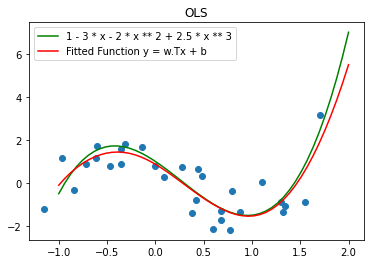

In [ ]:
X_train, Y_train, X_test, Y_test = split_data(X_multi, Y_multi)

w, b = multivar_grad(X_train, Y_train, X_test, Y_test)

print('----' * 30)

w, b = multivar_closedform(X_train, Y_train, X_test, Y_test)

## Coding up gradient descent for regularized (ridge) regression
**Question:** For Regularized (Ridge) regression loss function $mse = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2 + \lambda \|{\mathbf w}\|^2$. Derive the vectorized formula for $\frac{\partial mse}{\partial {\mathbf w}}$

ANS: $$\nabla_w mse\_reg = \frac{2}{N}X(X^T{\mathbf w} - {\mathbf y}) + 2\lambda {\mathbf w}$$

###Now, Complete the following functions
**Question:**  Complete the functions **multivar_reg_grad** and **multivar_reg_closedform**. Include the generated plots.

In [ ]:

def multivar_reg_grad(X_train, Y_train, X_val, Y_val, epochs=5000, lr=0.05, lamda = 0.05):
    '''
    Perform L2 regularized multi variable least squares regression using gradient descent

    Args:
    X_train - numpy array of shape (n_samples_train, 5)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 5)
    Y_val - numpy array of shape (n_samples_val, 1)
    epochs - number of gradient descent steps
    lr - learnig rate
    lamda - regularization weight
    '''

    w = [0.0] * X_train.shape[1]
    b = 0

    ## NOTE
    n_samples = X_train.shape[0]
    X_train_temp = np.concatenate((X_train,np.ones((n_samples,1))),axis = 1)
    W_temp = np.concatenate((np.asarray(w),np.asarray([b])),axis = 0)
    W_temp = W_temp.reshape((-1,1))
    for exp in range(epochs):
        grad = 2/n_samples * np.matmul(X_train_temp.T, (np.matmul(X_train_temp,W_temp)-Y_train.reshape((-1,1))))
        grad += 2 * lamda * W_temp
        W_temp = W_temp - lr * grad
    w = W_temp[0:-1].reshape(-1)
    b = float(W_temp[-1])


    ## END NOTE

    mse_train = mse_multi_var(X_train, Y_train, w, b)
    mse_val = mse_multi_var(X_val, Y_val, w, b)
    print(f'Validation loss if {mse_val}')
    print(f'Training Loss loss if {mse_train}')
    plot_curves(list(w), b, X_train, Y_train)
    return w, b


def multivar_reg_closedform(X_train, Y_train, X_val, Y_val, lamda=0.05):
    '''
    Perform L2 regularized multi variable least squares regression using
    closed form update rules

    Args:
    X_train - numpy array of shape (n_samples_train, 5)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 5)
    Y_val - numpy array of shape (n_samples_val, 1)
    lambda - regularization weight
    '''

    w = [0.0] * X_train.shape[1]
    b = 0

    ## NOTE
    n_samples = X_train.shape[0]
    X_train_temp = np.concatenate((X_train,np.ones((n_samples,1))), axis = 1)
    res = np.dot(inv(np.dot(X_train_temp.T,X_train_temp) + lamda * n_samples * np.eye(X_train_temp.shape[1])),np.dot(X_train_temp.T,Y_train))
    w = res[:-1,].reshape(-1)
    b = float(res[-1,])


    ## END NOTE

    mse_train = mse_multi_var(X_train, Y_train, w, b)
    mse_val = mse_multi_var(X_val, Y_val, w, b)
    print(f'Validation loss of {mse_val}')
    print(f'Training Loss loss of {mse_train}')
    plot_curves(list(w), b, X_train, Y_train)
    return w, b


Validation loss if 1.1386416929693937
Training Loss loss if 0.6987098173377421


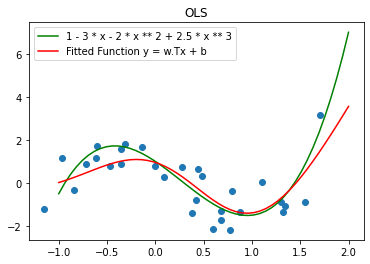

------------------------------------------------------------------------------------------------------------------------
Validation loss if 1.1386416929693897
Training Loss loss if 0.6987098173377403


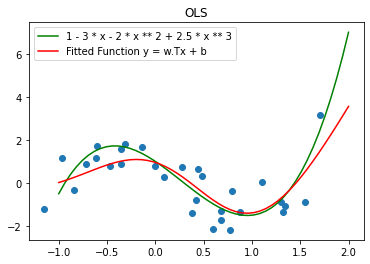

In [ ]:
X_train, Y_train, X_val, Y_val = split_data(X_multi, Y_multi, train_ratio=0.6)

w, b = multivar_reg_grad(X_train, Y_train, X_val, Y_val)

print('----' * 30)

w, b = multivar_reg_closedform(X_train, Y_train, X_val, Y_val)

Note: The training loss has increased owing to regularization. The red curve is bending less owing to regularization. If $\lambda \rightarrow \infty$ then red curve might tend to linear.

# Bayesian Linear Regression (Self and Extra Reading - giving principled explanation to regularization)

Now, we will move to Bayesian Linear Regression. The fundamental difference here is that we model $(w, b)$ as a Random Variable unlike the previous approaches that give point estimates of them.

On the theory part, we will will derive formulae for single variable regression. For the programming part, we deal with multi-variable regression. We give you the formulae and then complete the code.


Let us consider the dataset $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^N$ where $x_i \in \mathcal{R}$ and $y_i \in \mathcal{R}$. We need to learn the parameter $w \in \mathcal{R}$. For convenience, let us assume the bias $b = 0$. (Note: For the programming part, you need to learn bias as well).

1.  Let us assume the parameter $w$ has a prior given by Gaussian distribution $\mathcal{N}(\mu_0, 1)$. Mention the complete expression for $p(w)$

ANS: $$p(w) = \frac{1}{\sqrt{2\pi}} exp\big\{-\frac{1}{2}(w - \mu_0)^2\big\}$$
2.  Because we need a conjugate prior, we also assume that the data likelihood is Gaussian. i.e. $p(y|x; w) = \mathcal{N}(wx, 1)$

3.  Assuming the dataset $\mathcal{D}$ is obtained \texttt{IID}, give the expression for $p(D | w)$

ANS: $$p(D|w) = \frac{1}{(2\pi)^{\frac{N}{2}}} exp(- \frac{1}{2} \sum_i (y - wx_i)^2)$$
4.  Now that we have the expressions for prior and Data likelihood, give expression for the posterior $p(w | \mathcal{D})$ using the Bayes theorem.

ANS: $$p(w|D) = \frac{P(D|w)p(W)}{\int p(D|w)p(w)dw}$$
5.  From the expression above, we immediately realize that the denominator involves a daunting integral that is difficult to evaluate. Here is where we can leverage the conjugate prior assumption and find out $p(w)$ analytically (ignoring the denominator).
6.  We can simplify the numerator of $p(w | \mathcal{D})$ and thus deduce that $p(w | \mathcal{D}) \propto exp\big(-\frac{1}{2} \big[  w^2 (\sum_i x_i^2 + 1) - 2w (\sum_i y_i x_i + \mu_0) + \sum_i y_i^2 + \mu_0^2 \;\big] \; \big) $  (Equation 1)
7.  We know that posterior is also Gaussian by virtue of conjugate prior. Thus posterior has the form $p(w | \mathcal{D}) = N(\mu_N, \sigma_N^2) \propto exp(-\frac{1}{2\sigma_N^2} (w - \mu_N)^2 )$  (Equation 2)
8.  Compare Equation (1) and (2) above and thus deduce the values of $\mu_N, \sigma_N^2$

ANS: $$\mu_N = \frac{\sum_i y_ix_i + \mu_0}{\sum_ix_i^2+1}$$
$$\sigma_N^2  = \frac{1}{\sum_i x_i^2 + 1}$$

9.  What will happen to the estimates above when we observe lots of data. Give an expression for $\mu_N, \sigma_N^2$ as $N \rightarrow \infty$

ANS: As $N \rightarrow \infty$, $$\mu_N = \frac{\sum_i y_i x_i}{\sum_i x_i^2}$$
$$\sigma_N^2 = \frac{1}{\sum_i x_i^2}$$
10.  Briefly explain in one or two lines what you intuitively understand from the estimates in the limit $N \rightarrow \infty$

ANS: As $N \rightarrow \infty$,
- prior has no effect on the posterior.
- Bayesian estimate = MLE estimate
- Variance goes to 0



##MLE Estimate

1.  For the MLE estimate we maximize the (log) data likelihood i.e., $w^* = argmax_w\; p(D | w)$. For the above problem find the MLE estimate $w^*$

ANS: $$w^* = \frac{\sum_i y_i x_i}{\sum_i x_i^2}$$
2.  Compare and comment on the MLE and Bayesian estimate (in the limit of $\infty$ data) that you obtain

ANS: As $N \rightarrow \infty$, Bayesian estimates approach MLE estimate

## Implementing Bayesian Linear Regression

As we studied above, in the Bayesian approach, we model the parameters of the model as a Random variable.

We assume a (conjugate) prior distribution over the parameters ($p(w)$) and update  the posterior $p(w | D)$ based on the obervations.

We will assume next that parameters are sampled from Gaussian distribution and try to learn the mean and variance of posterior.

Following the above discussion,

- let prior $p(w) = \mathcal{N}(\mu_0, \sum_0) = \mathcal{N}(0, 0.5)$
- We know that $p(w | \mathcal{D}) \propto p(w) P(\mathcal{D} | w)$
- Then, $p(w | \mathcal{D}) = \mathcal{N}(\mu_N, \sum_N)$
- And $p(\mathcal{D} | w) = \mathcal{N}(y| w^Tx, \sigma^2I)$

For this assignment, feel free to play with various values of $\sigma^2$ that gives you a better fit.

Finally the posterior parameters are given by, <br>
$\mu_N = \sum_N (\sum_0^{-1} \mu_0 + \frac{1}{\sigma^2}X^Ty)$ <br>
$\sum_N = (\sum_0^{-1} + \frac{1}{\sigma^2}X^TX)^{-1}$


### Learning Bias b
Eventhough the above formula shows how to compute $w$, we expect you to learn the bias $b$ also.

<font color='blue'> Hint: You can append a constant $1$ to all the input features $x$. Thus making the data $X \in \mathcal{R}^{d+1}$. </font>

In [ ]:
def bayesion_lr(X_train, Y_train, X_val, Y_val):
    '''
    Perform Bayesian Linear Regression

    Args:
    X_train - numpy array of shape (n_samples_train, 5)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 5)
    Y_val - numpy array of shape (n_samples_val, 1)
    '''

    ## NOTE
    sigma_sq = 1e-6 ## playaround with this
    n_samples = X_train.shape[0]
    features = X_train.size // n_samples
    W = np.zeros((features+1,1))
    mu0 = 0
    sigma0 = 0.5 * np.eye(W.shape[0])
    X_train_temp = np.concatenate((X_train,np.ones((n_samples,1))),axis = 1)
    sigma_N = inv(inv(sigma0) + 1/sigma_sq * np.matmul(X_train_temp.T,X_train_temp))
    mu_N = np.matmul(sigma_N,1/sigma_sq * np.matmul(X_train_temp.T , Y_train.reshape((-1,1))))

    w = list(mu_N[0:-1].reshape(-1))
    b = float(mu_N[-1])


    ## END NOTE

    plot_curves(w, b, X_train, Y_train)
    return w,b

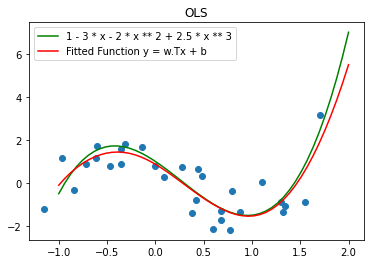

([-2.5639330275470624,
  -1.2575362930244487,
  1.8476856730197753,
  -0.01647884554030757,
  0.21753869405501902],
 0.6527264609668149)

In [ ]:
X_train, Y_train, X_val, Y_val = split_data(X_multi, Y_multi, train_ratio=0.6)

bayesion_lr(X_train, Y_train, X_val, Y_val)

#In Retrospect!

We saw multiple methods to learn the linear regression weights $(w, b)$ for fitting the function $f(x)$. Compare different methods and present your experience/opinion on which one you think is superior. This is a open-ended question and we encourage you to compare for example running time, convergence, # iterations etc and explain briefly with plots where applicable.